In [1]:
import pandas as pd
LumA = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\ranked_boruta_genes_LumA.csv',index_col=[0])
LumB = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\ranked_boruta_genes_LumB.csv',index_col=[0])
her2 = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\ranked_boruta_genes_her2.csv',index_col=[0])
basal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\ranked_boruta_genes_basal.csv',index_col=[0])
normal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\ranked_boruta_genes_normal.csv',index_col=[0])

In [2]:
LumA.query("Ranking==1",inplace=True)
LumB.query("Ranking==1",inplace=True)
her2.query("Ranking==1",inplace=True)
basal.query("Ranking==1",inplace=True)
normal.query("Ranking==1",inplace=True)
types = (LumA, LumB, her2, basal, normal)
names = ('LumA', 'LumB', 'her2', 'basal', 'normal')
for type, name in zip(types,names): 
    type.to_csv(rf'C:\Users\javte\Documents\SSEF project\datasets\boruta_genes\rank1 only\{name}.csv')


In [3]:
intersection = set(LumA.Feature) & set(LumB.Feature) & set(her2.Feature) & set(basal.Feature) & set(normal.Feature)
inter = list(intersection)

In [4]:
LumA_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\LumA_fc.csv',index_col=[0])
LumB_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\LumB_fc.csv',index_col=[0])
her2_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\her2_fc.csv',index_col=[0])
basal_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\basal_fc.csv',index_col=[0])
normal_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\normal_fc.csv',index_col=[0])

In [5]:
inter_LumA= LumA_fc.loc[inter]
inter_LumB= LumB_fc.loc[inter]
inter_her2= her2_fc.loc[inter]
inter_basal= basal_fc.loc[inter]
inter_normal= normal_fc.loc[inter]


In [6]:
cols = ['genes','logFC']
inter_LumA = inter_LumA[cols]
inter_LumB = inter_LumB[cols]
inter_her2 = inter_her2[cols]
inter_basal = inter_basal[cols]
inter_normal = inter_normal[cols]


In [7]:
inter_LumA = inter_LumA.join(inter_LumB.logFC, lsuffix='_LumA',rsuffix='_LumB')
inter_LumA = inter_LumA.join(inter_her2.logFC)
inter_LumA = inter_LumA.join(inter_basal.logFC, lsuffix='_her2',rsuffix='_basal')
inter_LumA = inter_LumA.join(inter_normal.logFC)
inter_LumA.rename(columns = {'logFC':'logFC_normal'}, inplace = True)


In [8]:
genes = list(inter_LumA['genes'])
genes_to_convert = [item.split('.',1)[0] for item in genes]
genes_to_convert = '\n'.join(genes_to_convert)


In [9]:
print(genes_to_convert)

ENSG00000229246
ENSG00000186642
ENSG00000167434
ENSG00000165197
ENSG00000161649
ENSG00000154263
ENSG00000168497


In [10]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
converted = gp.convert(organism='hsapiens',
            query=genes_to_convert,
            target_namespace='ENTREZGENE_ACC')


In [11]:
converted

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,ENSG00000229246,None,1,1,None,None,,query_1
1,ENSG00000186642,5138,2,1,PDE2A,phosphodiesterase 2A [Source:HGNC Symbol;Acc:H...,"ARRAYEXPRESS,ENSG",query_1
2,ENSG00000167434,762,3,1,CA4,carbonic anhydrase 4 [Source:HGNC Symbol;Acc:H...,"ARRAYEXPRESS,ENSG",query_1
3,ENSG00000165197,2277,4,1,VEGFD,vascular endothelial growth factor D [Source:H...,"ARRAYEXPRESS,ENSG",query_1
4,ENSG00000161649,146894,5,1,CD300LG,CD300 molecule like family member g [Source:HG...,"ARRAYEXPRESS,ENSG",query_1
5,ENSG00000154263,10349,6,1,ABCA10,ATP binding cassette subfamily A member 10 [So...,"ARRAYEXPRESS,ENSG",query_1
6,ENSG00000168497,8436,7,1,CAVIN2,caveolae associated protein 2 [Source:HGNC Sym...,"ARRAYEXPRESS,ENSG",query_1


In [12]:
converted.loc[converted['incoming']=='ENSG00000229246','name']='LINC00377'
converted.loc[converted['incoming']=='ENSG00000229246','description']='long intergenic non-protein coding RNA 377 [Source:HGNC Symbol;Acc:HGNC:42703]'
display(converted)

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,ENSG00000229246,None,1,1,LINC00377,long intergenic non-protein coding RNA 377 [So...,,query_1
1,ENSG00000186642,5138,2,1,PDE2A,phosphodiesterase 2A [Source:HGNC Symbol;Acc:H...,"ARRAYEXPRESS,ENSG",query_1
2,ENSG00000167434,762,3,1,CA4,carbonic anhydrase 4 [Source:HGNC Symbol;Acc:H...,"ARRAYEXPRESS,ENSG",query_1
3,ENSG00000165197,2277,4,1,VEGFD,vascular endothelial growth factor D [Source:H...,"ARRAYEXPRESS,ENSG",query_1
4,ENSG00000161649,146894,5,1,CD300LG,CD300 molecule like family member g [Source:HG...,"ARRAYEXPRESS,ENSG",query_1
5,ENSG00000154263,10349,6,1,ABCA10,ATP binding cassette subfamily A member 10 [So...,"ARRAYEXPRESS,ENSG",query_1
6,ENSG00000168497,8436,7,1,CAVIN2,caveolae associated protein 2 [Source:HGNC Sym...,"ARRAYEXPRESS,ENSG",query_1


In [13]:
names=list(converted.name) #names = gene symbols

descriptions_long=list(converted.description) #long descriptions 

descriptions = [item.split('[',1)[0]for item in descriptions_long] # remove [Source...

concat_func = lambda x,y: x + ": " + str(y) 
inter_LumA.index = list(map(concat_func,names,descriptions))
inter_LumA.genes = list(names)# list the map function
display(inter_LumA)

,genes,logFC_LumA,logFC_LumB,logFC_her2,logFC_basal,logFC_normal
LINC00377: long intergenic non-protein coding RNA 377,LINC00377,-4.093084,-5.003995,-4.499900,-4.109750,-1.974739
PDE2A: phosphodiesterase 2A,PDE2A,-2.808472,-3.594250,-3.513679,-3.768122,-2.016734
CA4: carbonic anhydrase 4,CA4,-6.331970,-8.116992,-7.551134,-7.653623,-4.228454
VEGFD: vascular endothelial growth factor D,VEGFD,-5.716690,-6.600323,-6.989058,-6.082338,-2.799917
CD300LG: CD300 molecule like family member g,CD300LG,-5.721135,-7.863754,-7.812080,-7.545065,-3.659360
ABCA10: ATP binding cassette subfamily A member 10,ABCA10,-3.580456,-5.009097,-5.360821,-4.862154,-2.054404
CAVIN2: caveolae associated protein 2,CAVIN2,-3.809099,-5.227843,-5.346751,-5.574720,-2.522290


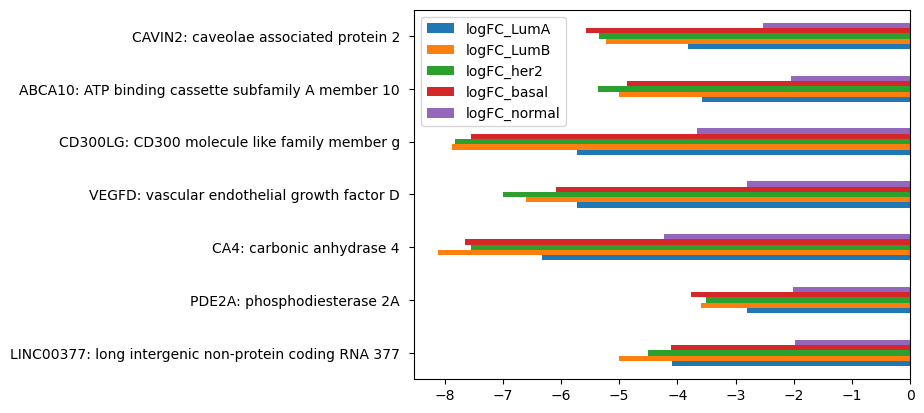

In [14]:
ax = inter_LumA.plot.barh()


In [15]:
copy_inter_LumA=inter_LumA.sort_values(by='logFC_LumA',ascending=False)

<AxesSubplot:xlabel='genes'>

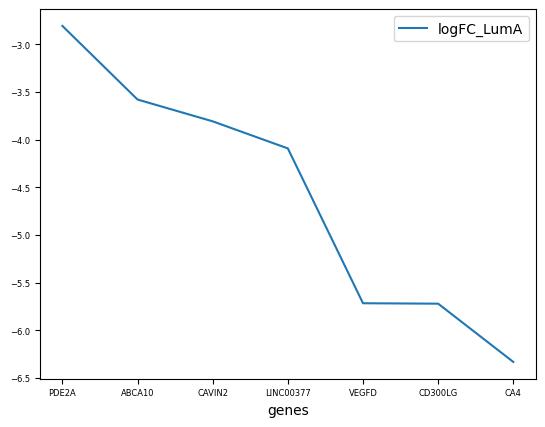

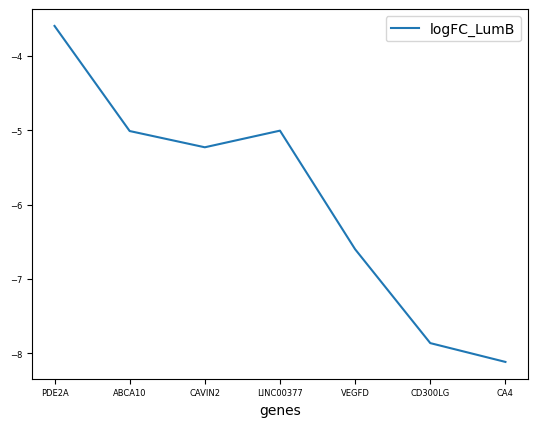

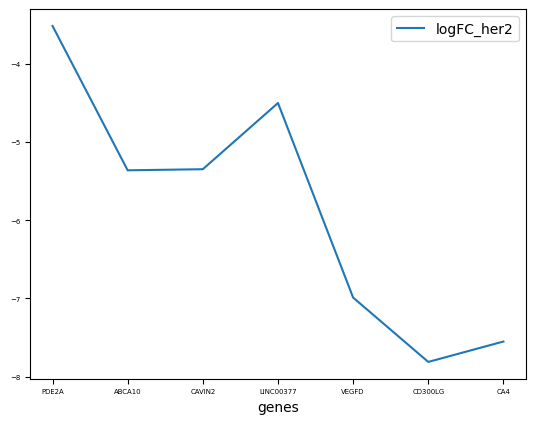

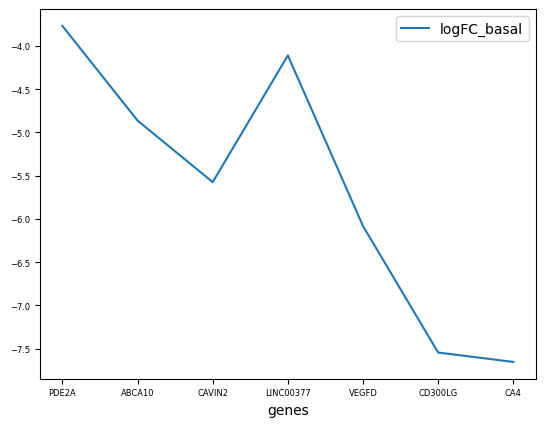

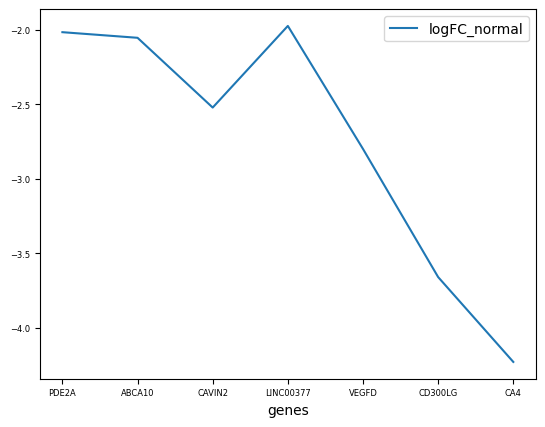

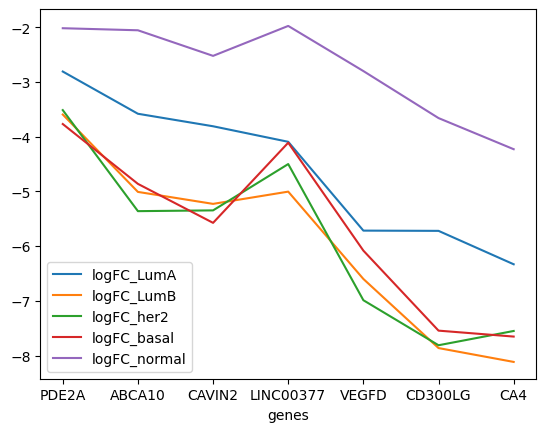

In [16]:
copy_inter_LumA.plot(x='genes',y='logFC_LumA',fontsize=6)
copy_inter_LumA.plot(x='genes',y='logFC_LumB',fontsize=6)
copy_inter_LumA.plot(x='genes',y='logFC_her2',fontsize=5)
copy_inter_LumA.plot(x='genes',y='logFC_basal',fontsize=6)
copy_inter_LumA.plot(x='genes',y='logFC_normal',fontsize=6)
copy_inter_LumA.plot(x='genes')

In [17]:
converted.loc[:,['incoming','name','description']]

,incoming,name,description
0,ENSG00000229246,LINC00377,long intergenic non-protein coding RNA 377 [So...
1,ENSG00000186642,PDE2A,phosphodiesterase 2A [Source:HGNC Symbol;Acc:H...
2,ENSG00000167434,CA4,carbonic anhydrase 4 [Source:HGNC Symbol;Acc:H...
3,ENSG00000165197,VEGFD,vascular endothelial growth factor D [Source:H...
4,ENSG00000161649,CD300LG,CD300 molecule like family member g [Source:HG...
5,ENSG00000154263,ABCA10,ATP binding cassette subfamily A member 10 [So...
6,ENSG00000168497,CAVIN2,caveolae associated protein 2 [Source:HGNC Sym...


<AxesSubplot:>

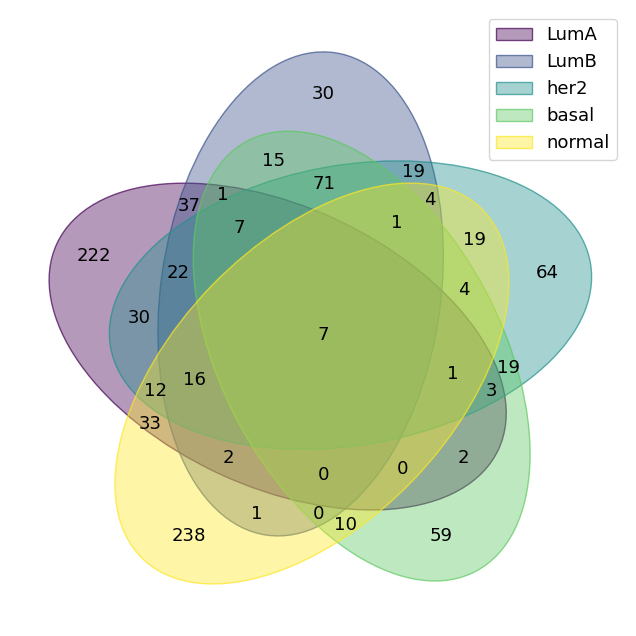

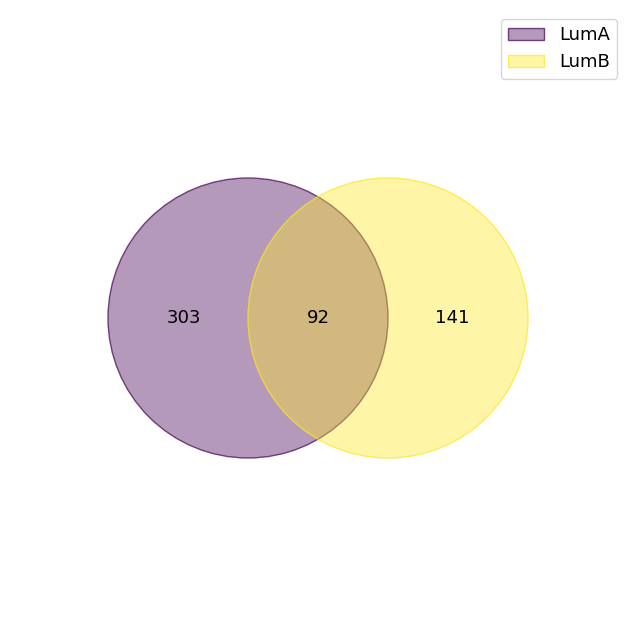

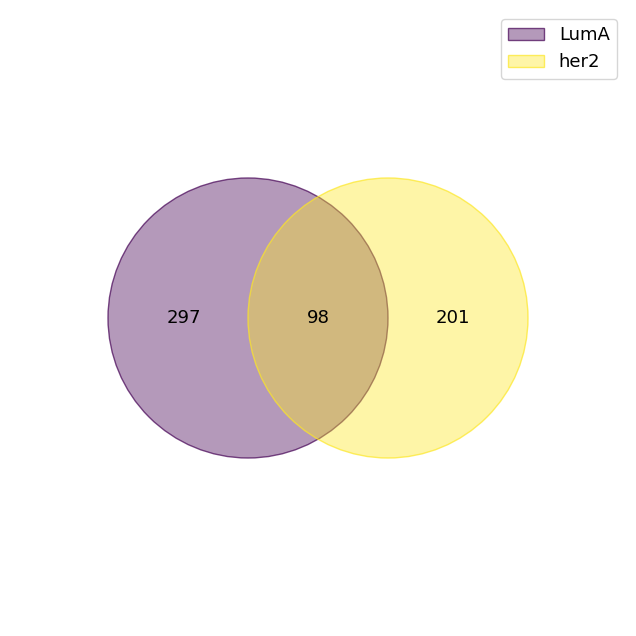

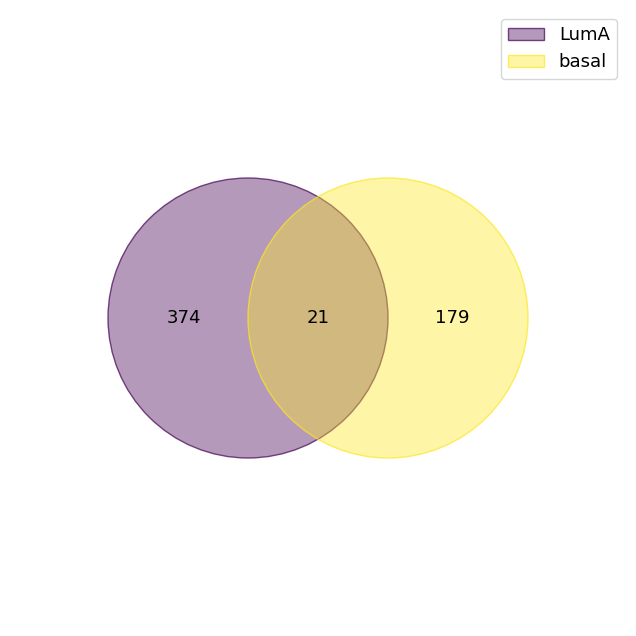

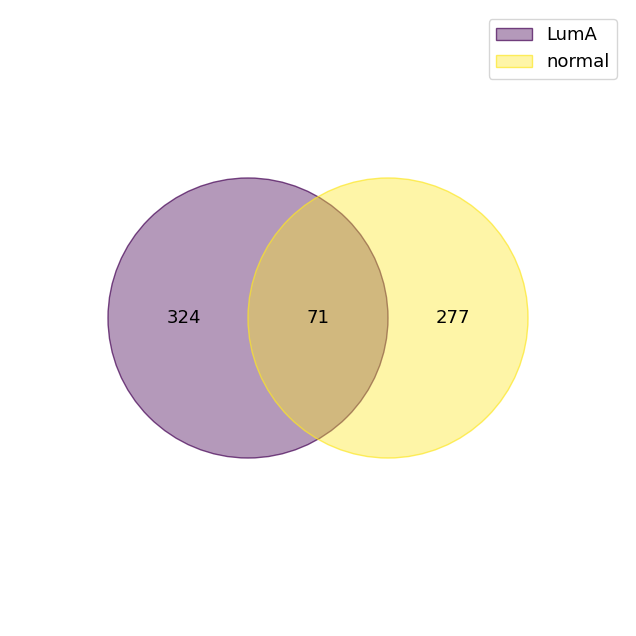

In [18]:
from venn import venn
d1 = LumA.Feature
d2 = LumB.Feature
d3 = her2.Feature
d4 = basal.Feature
d5 = normal.Feature

datas = {
    "LumA": set(d1),
    "LumB": set(d2),
    "her2": set(d3),
    "basal": set(d4),
    "normal": set(d5)
}

venn(datas)
datas1 = {
    "LumA": set(d1),
    "LumB": set(d2),
}
datas2 = {
    "LumA": set(d1),
    "her2": set(d3),
}
datas3 = {
    "LumA": set(d1),
    "basal": set(d4),
}
datas4 = {
    "LumA": set(d1),
    "normal": set(d5)
}

venn(datas1)
venn(datas2)
venn(datas3)
venn(datas4)